In [17]:
import requests
import json
import matplotlib.pyplot as plt

headers = {
    "x-rapidapi-host": "api-nba-v1.p.rapidapi.com",
    "x-rapidapi-key": "61ec54c2e9msh0578e0c47cbfd23p1259fcjsnd75b76f6144c"
}

playerLastName = input("Enter the last name of the desired player: ") 

playerInfo = requests.get("https://api-nba-v1.p.rapidapi.com/players/lastName/"+playerLastName, headers=headers).json()

while playerInfo["api"]["results"] == 0:
    playerLastName = input("Enter a valid last name: ") 
    playerInfo = requests.get("https://api-nba-v1.p.rapidapi.com/players/lastName/"+playerLastName, headers=headers).json()

playerInfo

Enter the last name of the desired player: Tatum


{'api': {'status': 200,
  'message': 'GET players/lastName/Tatum',
  'results': 1,
  'filters': ['playerId',
   'teamId',
   'league',
   'country',
   'lastName',
   'firstName'],
  'players': [{'firstName': 'Jayson',
    'lastName': 'Tatum',
    'teamId': '2',
    'yearsPro': '2',
    'collegeName': 'Duke',
    'country': 'USA',
    'playerId': '882',
    'dateOfBirth': '1998-03-03',
    'affiliation': 'Duke/USA',
    'startNba': '2017',
    'heightInMeters': '2.03',
    'weightInKilograms': '95.3',
    'leagues': {'standard': {'jersey': '0', 'active': '1', 'pos': 'F-G'}}}]}}

In [26]:
import pandas as pd
import numpy as np
import requests
import warnings
warnings.filterwarnings('ignore')


url = requests.get("https://api-nba-v1.p.rapidapi.com/players/lastName/"+playerLastName, headers=headers).json()
r = requests.get(url)
print(r.text)
# =pd.read_csv(url)


InvalidSchema: No connection adapters were found for '{'api': {'status': 200, 'message': 'GET players/lastName/James', 'results': 4, 'filters': ['playerId', 'teamId', 'league', 'country', 'lastName', 'firstName'], 'players': [{'firstName': 'LeBron', 'lastName': 'James', 'teamId': '17', 'yearsPro': '16', 'collegeName': 'No College', 'country': 'USA', 'playerId': '265', 'dateOfBirth': '1984-12-30', 'affiliation': 'St. Vincent-St. Mary HS (OH)/USA', 'startNba': '2003', 'heightInMeters': '2.06', 'weightInKilograms': '113.4', 'leagues': {'standard': {'jersey': '23', 'active': '1', 'pos': 'F'}}}, {'firstName': 'Justin', 'lastName': 'James', 'teamId': '30', 'yearsPro': '0', 'collegeName': 'Wyoming', 'country': 'USA', 'playerId': '1869', 'dateOfBirth': '1997-01-24', 'affiliation': ' USA/USA', 'startNba': '2019', 'heightInMeters': '2.01', 'weightInKilograms': '86.2', 'leagues': {'standard': {'jersey': '10', 'active': '1', 'pos': 'G-F'}, 'vegas': {'jersey': '0', 'active': '1', 'pos': 'G'}}}, {'firstName': 'Justin', 'lastName': 'James', 'teamId': '30', 'yearsPro': '0', 'collegeName': 'Wyoming', 'country': '', 'playerId': '2072', 'dateOfBirth': '1997-01-24', 'affiliation': 'Wyoming', 'startNba': '0', 'heightInMeters': '2.01', 'weightInKilograms': '83.0', 'leagues': {'sacramento': {'jersey': '0', 'active': '1', 'pos': 'G'}}}, {'firstName': 'Young', 'lastName': 'James', 'teamId': None, 'yearsPro': '0', 'collegeName': '', 'country': '', 'playerId': '2522', 'dateOfBirth': '', 'affiliation': '', 'startNba': '0', 'heightInMeters': '', 'weightInKilograms': '', 'leagues': {'standard': {'jersey': '1', 'active': '0', 'pos': ''}}}]}}'

In [11]:
playerId = playerInfo["api"]["players"][0]["playerId"]

In [32]:
playerStats = requests.get("https://api-nba-v1.p.rapidapi.com/statistics/players/playerId/" + str(playerId), headers=headers)
playerStats

<Response [200]>

Enter the last name of the desired player: James
Enter the desired statistic: points
Enter the desired number of games: 3
Average points Per Game: 18.666666666666668


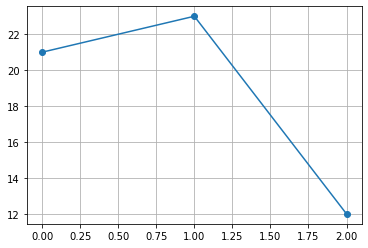

In [21]:
recentGames = playerStats.json()["api"]["statistics"] 
points = []

stats = ['points', 'pos', 'min', 'fgm', 'fga', 'fgp', 'ftm', 'fta', 'ftp', 'tpm', 'tpa', 'tpp', 'offReb', 'defReb', 'totReb', 'assists', 'pFouls', 'steals', 'turnovers', 'blocks', 'plusMinus']

playerLastName = input("Enter the last name of the desired player: ") 
desiredStat = input("Enter the desired statistic: ")
while desiredStat not in stats:
  desiredStat = input("Invalid statistic, reselect: ")

numberOfGames = input("Enter the desired number of games: ")
while numberOfGames.isdigit() and int(numberOfGames) < 1:
  numberOfGames = input("Number of games must be positive integer, re-enter:")

numberOfGames = int(numberOfGames)

for i in range(numberOfGames):
  point = recentGames[i][desiredStat]
  if point != "":
    points.append(int(recentGames[i][desiredStat]))

plt.plot(points, marker='o')
plt.grid()
print("Average "+ desiredStat +" Per Game: " + str(sum(points) / len(points))) 

In [2]:
pip install nba-api

     |████████████████████████████████| 225kB 5.0MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
from nba_api.stats.endpoints import commonplayerinfo

In [4]:
commonplayerinfo

<module 'nba_api.stats.endpoints.commonplayerinfo' from '/opt/conda/lib/python3.7/site-packages/nba_api/stats/endpoints/commonplayerinfo.py'>

In [7]:
player_info = commonplayerinfo.CommonPlayerInfo(player_id='2544')

player_info.get_response()

'{"resource":"commonplayerinfo","parameters":[{"PlayerID":2544},{"LeagueID":null}],"resultSets":[{"name":"CommonPlayerInfo","headers":["PERSON_ID","FIRST_NAME","LAST_NAME","DISPLAY_FIRST_LAST","DISPLAY_LAST_COMMA_FIRST","DISPLAY_FI_LAST","BIRTHDATE","SCHOOL","COUNTRY","LAST_AFFILIATION","HEIGHT","WEIGHT","SEASON_EXP","JERSEY","POSITION","ROSTERSTATUS","TEAM_ID","TEAM_NAME","TEAM_ABBREVIATION","TEAM_CODE","TEAM_CITY","PLAYERCODE","FROM_YEAR","TO_YEAR","DLEAGUE_FLAG","NBA_FLAG","GAMES_PLAYED_FLAG","DRAFT_YEAR","DRAFT_ROUND","DRAFT_NUMBER"],"rowSet":[[2544,"LeBron","James","LeBron James","James, LeBron","L. James","1984-12-30T00:00:00","No College","USA","St. Vincent-St. Mary HS (OH)/USA","6-9","250",16,"23","Forward","Active",1610612747,"Lakers","LAL","lakers","Los Angeles","lebron_james",2003,2019,"N","Y","Y","2003","1","1"]]},{"name":"PlayerHeadlineStats","headers":["PLAYER_ID","PLAYER_NAME","TimeFrame","PTS","AST","REB","PIE"],"rowSet":[[2544,"LeBron James","2019-20",25.900000,10.8000

In [16]:
from nba_api.stats.static import teams

In [17]:
teams.get_teams()

[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Atlanta',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970},
 {'id': 1610612740,
  'full_name': 'New Orleans Pelicans',
  'abbreviation': 'NOP',
  'nickname': 'Pelicans',
  'city': 'New Orleans',
  'state': 'Louisiana',
  'year_founded': 2002},
 {'id': 1610612741,
  'full_name': 'Chicago Bulls',
  'abbreviation': 'CHI',
  'nickname': 'Bulls',
  'city': 'Chicago',
  'state': 'Illinois',
  'year_founded': 1966},
 {'id': 1610612742,
  'full_name': 'Dallas Mavericks',
  'abbreviation': 'DAL',
  'nickname': 'Mavericks',
  'city': 'Dallas',

In [20]:
teams.find_teams_by_full_name('cav')

[{'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970}]